# ІА-02 Мельник Горб Петрущенуко Лаб2


In [16]:
path_to_data = "/content/drive/MyDrive/TMH/lab 2/data/"

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd $path_to_data
!wget https://archive.ics.uci .edu/static/public/267/banknote+authentication.zip -q --no-check-certificate
!unzip -o banknote+authentication.zip  # overwrites existing "data_banknote_authentication.txt"
!rm banknote+authentication.zip

%ls

/content/drive/MyDrive/TMH/lab 2/data
Archive:  banknote+authentication.zip
 extracting: data_banknote_authentication.txt  
data_banknote_authentication.txt*


---

<br /><br /><br />
# Завдання


1. Завантажте дані.

2. Реалізувати модель логістичної регресії з наступними функціями втрат:
- а) Logistic loss
- б) Adaboost loss
- в) binary crossentropy

3. Візуалізувати криві навчання моделі бінарної класифікації у вигляді
динаміки зміни кожної з функцій помилок п.2 на тренувальній та тестовій вибірках.

4. Порівняти якість класифікації за метрикою `accuracy` у кожному з трьох
модифікацій алгоритму.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import accuracy_score

data = np.loadtxt('data_banknote_authentication.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [19]:
lr = LogisticRegression(max_iter=100)

ab = AdaBoostClassifier(estimator=lr, n_estimators=50, algorithm='SAMME')

lr2 = LogisticRegression(max_iter=1000)

estimators = [
    (lr, 'Logistic loss'),
    (ab, 'Adaboost loss'),
    (lr2, 'Binary crossentropy')
]

Logistic loss - test accuracy: 0.996
Adaboost loss - test accuracy: 0.985
Binary crossentropy - test accuracy: 0.996


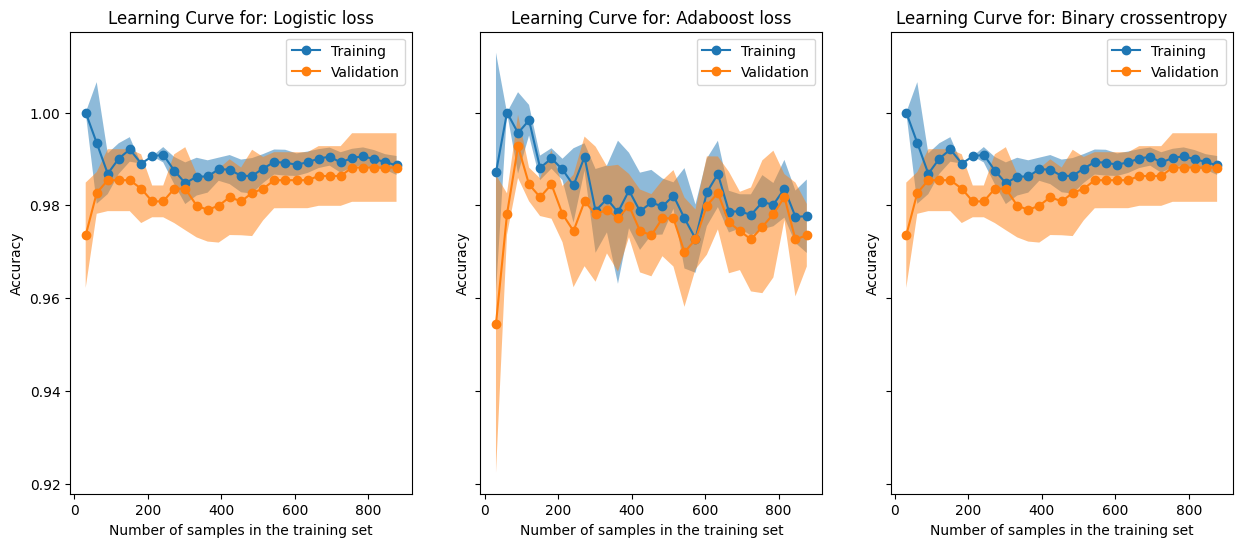

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)
for ax_idx, (estimator, name_of_loss) in enumerate(estimators):
    estimator.fit(X_train, y_train)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator,
        X=X_train,
        y=y_train,
        train_sizes=np.linspace(0.001, 1.0, 30),
        cv=5,
        scoring="accuracy"
    )
    display = LearningCurveDisplay(
        train_sizes=train_sizes,
        train_scores=train_scores,
        test_scores=test_scores,
        score_name="Accuracy"
    )
    display.plot(ax=ax[ax_idx], line_kw={"marker": "o"}, score_type='both')
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training", "Validation"])
    ax[ax_idx].set_title(f"Learning Curve for: {name_of_loss}")

    print(f'{name_of_loss} - test accuracy: {accuracy_score(estimator.predict(X_test), y_test):.3f}')

plt.show()